In [1]:

# To analyze trends and patterns in movie releases over time, we can employ various techniques such as time series analysis,
# exploratory data analysis, and statistical modeling.
# The provided dataset contains information about movies including their ratings, genres, release years, budgets, gross earnings,
# and other details. Let's break down the analysis into several steps:

# Data Preprocessing
# Exploratory Data Analysis (EDA)

# Time Series Analysis:

# Use time series decomposition techniques to identify seasonal patterns, if any, in movie releases.
# Perform time series forecasting to predict future movie release trends based on historical data.

# Build regression models to quantify the relationships between independent variables (e.g., genre, budget, ratings) and the number of movie releases or gross earnings.
# Use machine learning algorithms to predict movie success metrics based on various features.
# Interpretation and Conclusion:

# Summarize the key findings from the analysis.
# Provide insights into trends, patterns, and factors influencing movie releases and success.
# Suggest potential strategies for filmmakers, production companies, and investors based on the analysis results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
# load Data
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


In [4]:
# Load the dataset
df = pd.read_csv("movies.csv")

In [6]:
# Data preprocessing
df['released'] = pd.to_datetime(df['released'].str.split(" \(", expand=True)[0])

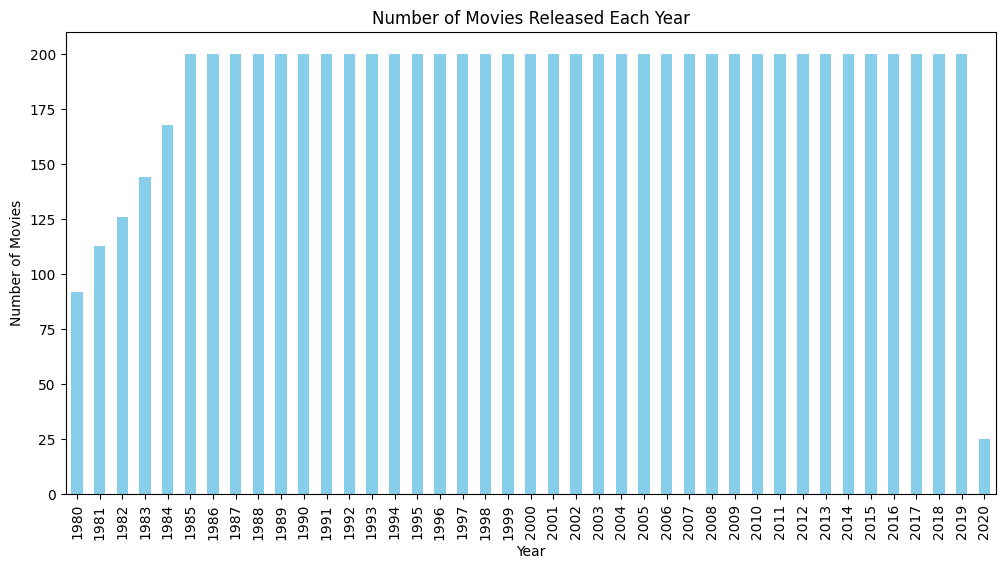

In [7]:
# Exploratory Data Analysis (EDA)
# Distribution of movies released each year
plt.figure(figsize=(12, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

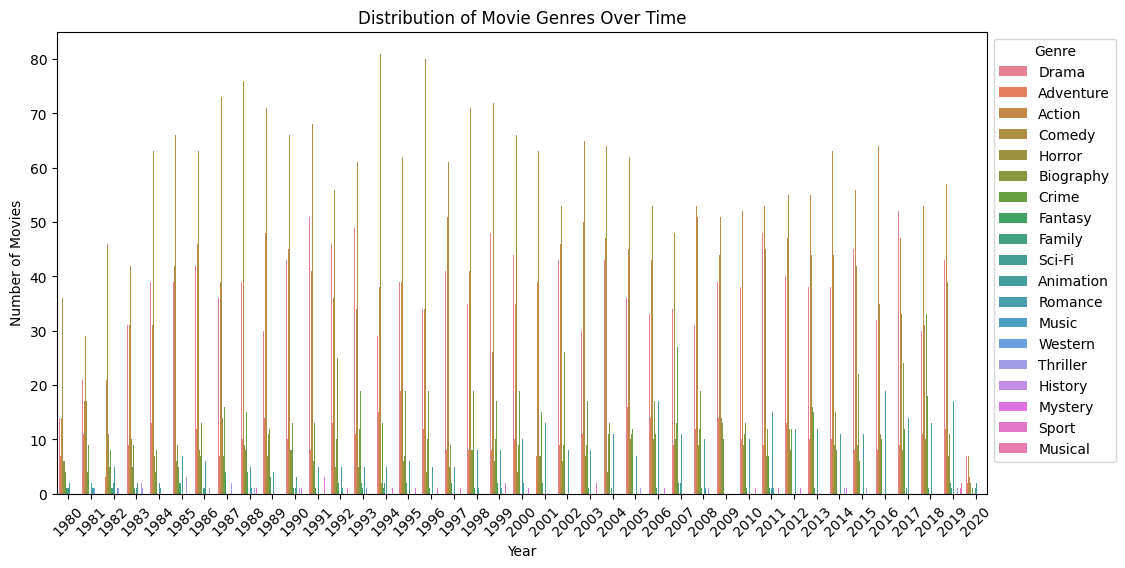

In [8]:
# Distribution of movie genres over time
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', hue='genre')
plt.title('Distribution of Movie Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()

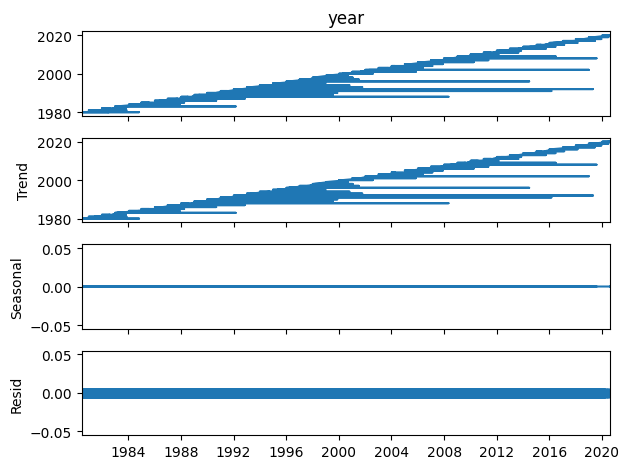

In [9]:
# Time series decomposition for seasonal patterns
df.set_index('released', inplace=True)
decomposition = seasonal_decompose(df['year'], model='additive', period=1)
decomposition.plot()
plt.show()



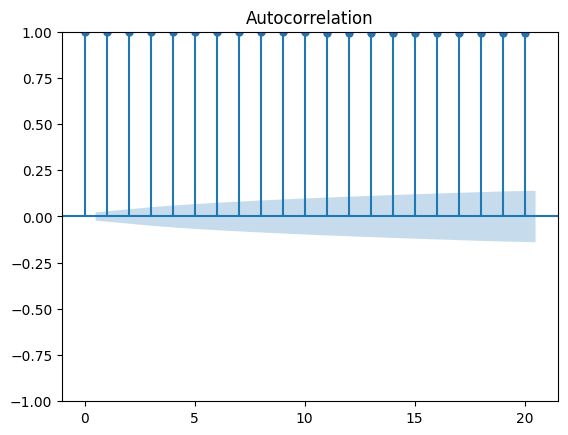

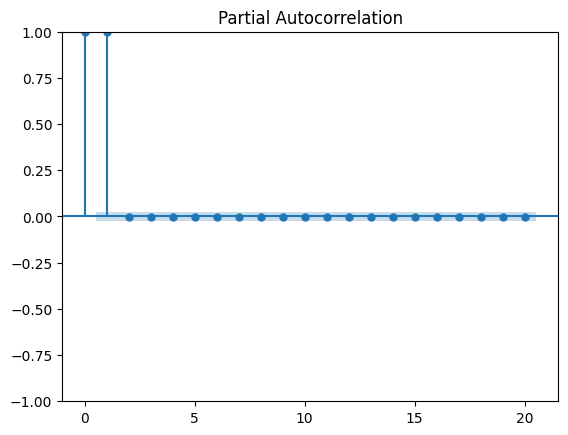

In [11]:
# Autocorrelation and Partial Autocorrelation plots
plot_acf(df['year'], lags=20)
plt.show()

plot_pacf(df['year'], lags=20)
plt.show()

In [12]:
# Time series forecasting using SARIMA
train, test = train_test_split(df['year'], test_size=0.2, shuffle=False)
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
fit_model = model.fit(disp=False)
forecast = fit_model.forecast(steps=len(test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

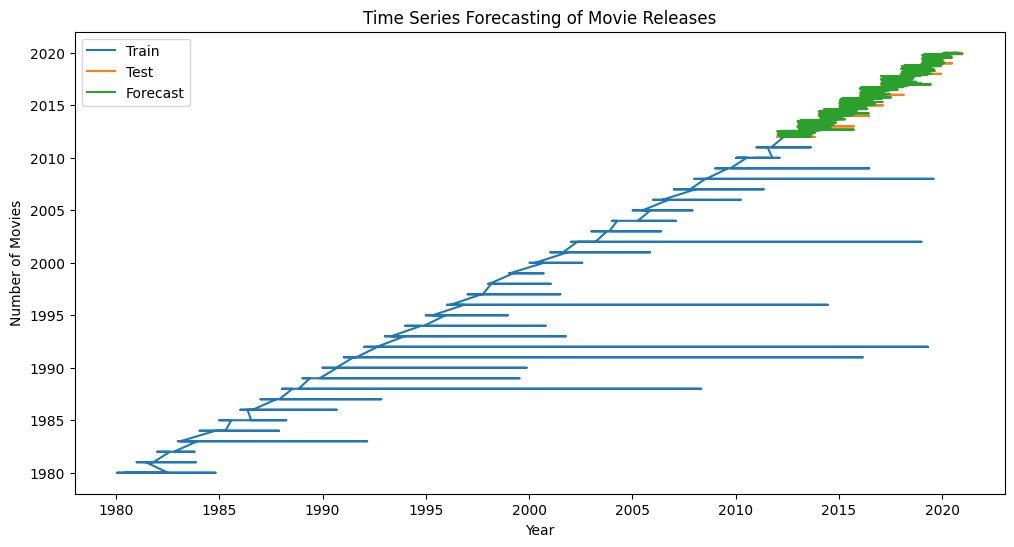

In [18]:
# Plotting actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.title('Time Series Forecasting of Movie Releases')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend()
plt.show()